<a href="https://colab.research.google.com/github/crunchdomo/llm_conversation/blob/main/recipe_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# !pip install seaborn

In [12]:
import pandas as pd

df = pd.read_json('structured_recipes.json')


df['ingredient_count'] = df['ingredients'].apply(len)
df['step_count'] = df['instructions'].apply(lambda x: len(x) if isinstance(x, dict) else 0)



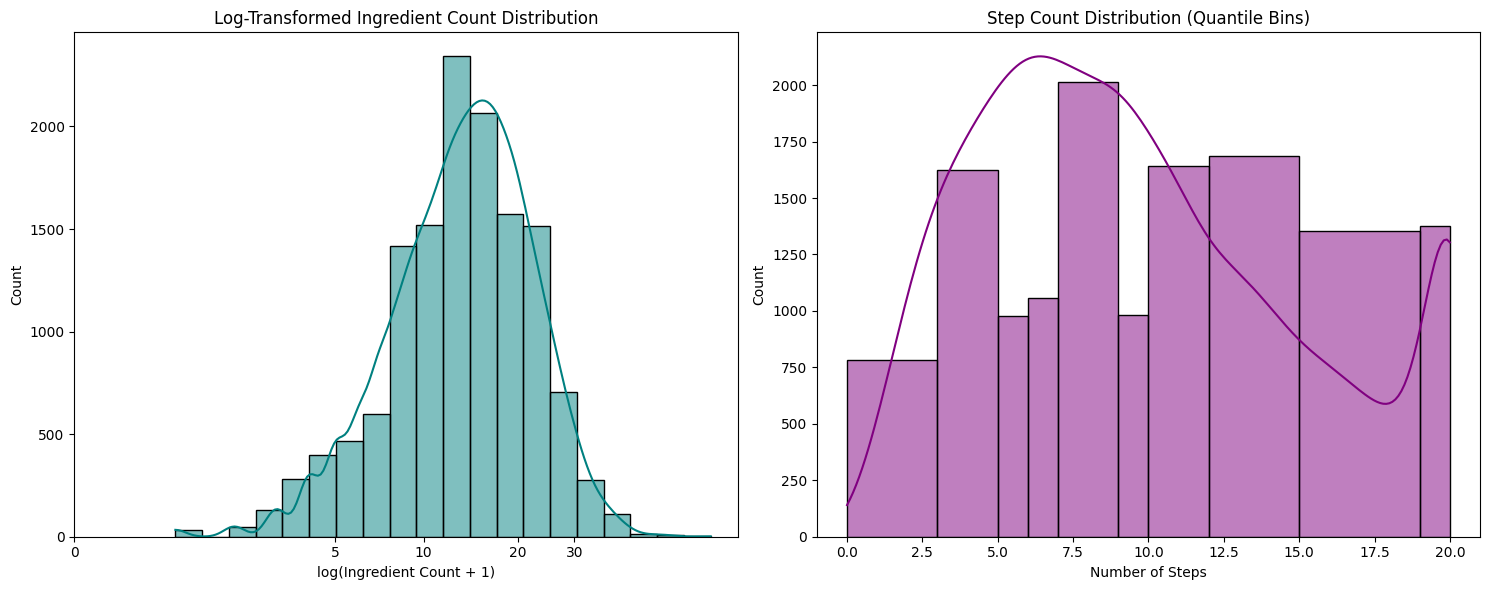

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(15, 6))

# Ingredient count histogram (log scale)
plt.subplot(1, 2, 1)
sns.histplot(np.log1p(df['ingredient_count']), bins=20, color='teal', kde=True)
plt.title('Log-Transformed Ingredient Count Distribution')
plt.xlabel('log(Ingredient Count + 1)')
plt.xticks(np.log1p([0, 5, 10, 20, 30]), [0, 5, 10, 20, 30])

# Step count histogram (quantile bins)
plt.subplot(1, 2, 2)
step_bins = np.quantile(df['step_count'], np.linspace(0, 1, 11))
sns.histplot(df['step_count'], bins=step_bins, color='purple', kde=True)
plt.title('Step Count Distribution (Quantile Bins)')
plt.xlabel('Number of Steps')

plt.tight_layout()
plt.show()


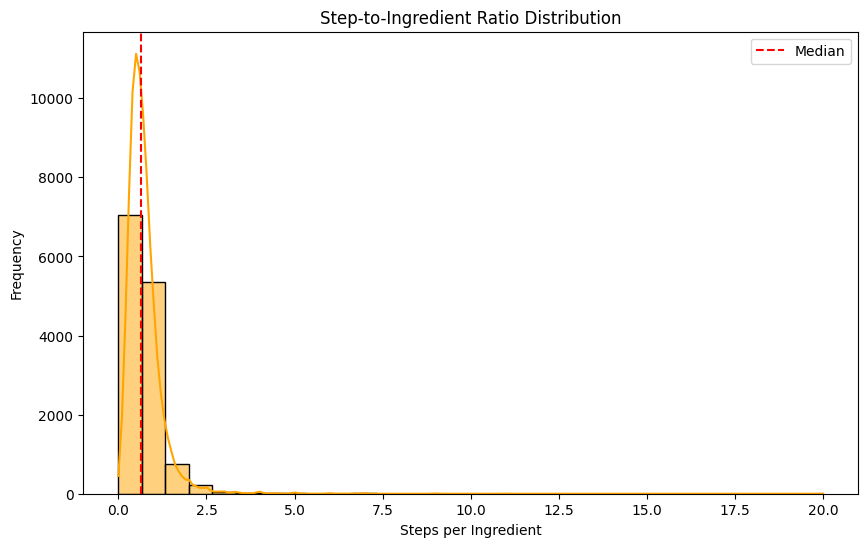

count    13501.000000
mean         0.734163
std          0.541313
min          0.000000
25%          0.434783
50%          0.631579
75%          0.888889
max         20.000000
Name: step_to_ingredient_ratio, dtype: float64


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter out recipes with zero ingredients to avoid division by zero
filtered_df = df[df['ingredient_count'] > 0].copy()

# Calculate the step-to-ingredient ratio
filtered_df['step_to_ingredient_ratio'] = filtered_df['step_count'] / filtered_df['ingredient_count']

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['step_to_ingredient_ratio'], bins=30, kde=True, color='orange')
plt.title('Step-to-Ingredient Ratio Distribution')
plt.xlabel('Steps per Ingredient')
plt.ylabel('Frequency')
plt.axvline(filtered_df['step_to_ingredient_ratio'].median(), color='red', linestyle='--', label='Median')
plt.legend()
plt.show()

# Print basic statistics
print(filtered_df['step_to_ingredient_ratio'].describe())


In [25]:
filtered_df = df[
    (df['ingredient_count'] >= 3) & (df['ingredient_count'] <= 20) &
    (df['step_count'] >= 3) & (df['step_count'] <= 20)
]
print(f"Filtered recipes: {len(filtered_df)} / {len(df)}")


Filtered recipes: 10044 / 13501


In [24]:
# Filter to reasonable ranges based on your histograms
filtered_df = df[
    (df['ingredient_count'] >= 5) & (df['ingredient_count'] <= 20) &
    (df['step_count'] >= 3) & (df['step_count'] <= 15)
]
print(f"Filtered recipes: {len(filtered_df)} / {len(df)}")


Filtered recipes: 8573 / 13501
